In [1]:
import numpy as np
import pandas as pd 
import  nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import sys  
!{sys.executable} -m pip install contractions
import contractions


%matplotlib inline

plt.rcParams['figure.figsize'] = [14,7]
plt.rcParams['figure.dpi'] = 70

     |████████████████████████████████| 284 kB 4.5 MB/s            
     |████████████████████████████████| 321 kB 65.1 MB/s            
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=106868 sha256=52c2e1d464f0e2b08520f958c7a146efd9a1001817ebdfe7911cc97243e5f544
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/The%20Office%20Lines/the-office_lines.csv")
df.head()

,Unnamed: 0,Character,Line,Season,Episode_Number
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,3,Jim,"Actually, you called me in here, but yeah.",1,1
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1


In [3]:
print(df['Character'].unique())
df['Count'] = df.groupby('Line')['Line'].transform('count')
df.sort_values(by='Count', ascending=False, inplace = True)
df.head()

['Michael' 'Jim' 'Pam' 'Dwight' 'Jan' 'Michel' 'Todd Packer' 'Phyllis'
 'Stanley' 'Oscar' 'Angela' 'Kevin' 'Ryan' 'Man' 'Roy'
 'Documentary Crew Member' 'Mr. Brown' 'Toby' 'Kelly' 'Meredith'
 'Travel Agent' 'Man On Phone' 'Everybody' 'Lonny' 'Darryl' 'Teammates'
 'Michael And Dwight' 'Warehouse Worker' 'Madge' 'Worker' 'Packer' 'Katy'
 'Guy At Bar' 'Pam And Jim' 'Employee' 'Chili’S Employee' 'Waitress'
 'Manager' 'Kevin’S Computer' 'Warehouse Guy' 'Warehouse Guys' 'Video'
 'Man In Video' 'Actor' 'Redheaded Actress' 'Mr. O’Malley' 'Albiny'
 'Pam’S Mom' 'Carol' 'Bill' 'Everyone' 'Crowd' 'Song' 'Dwight And Michael'
 'Sherri' 'Creed' 'Devon' 'Children' 'Kid' 'Vance Refrigeration Worker #1'
 'Vance Refrigeration Worker #2' 'Hank The Security Guard' 'Ira'
 'Ryan’S Voicemail' 'Master' 'Alyssa' 'Christian' 'Hostess'
 'Michael And Christian' 'Sadiq (It Guy)' 'Mark' 'Improv Teacher'
 'Mary-Beth' 'Girl Acting Pregnant' 'Actress' 'Michael And Jim'
 'Kevin & Oscar' 'All' 'Liquor Store Clerk' 'Bob V

,Unnamed: 0,Character,Line,Season,Episode_Number,Count
25781,27135,Dwight,Yeah.,5,12,254
25549,26892,David,Yeah.,5,11,254
16904,17935,Michael,Yeah.,4,1,254
11109,11810,Ryan,Yeah.,3,6,254
23698,24971,Michael,Yeah.,5,5,254


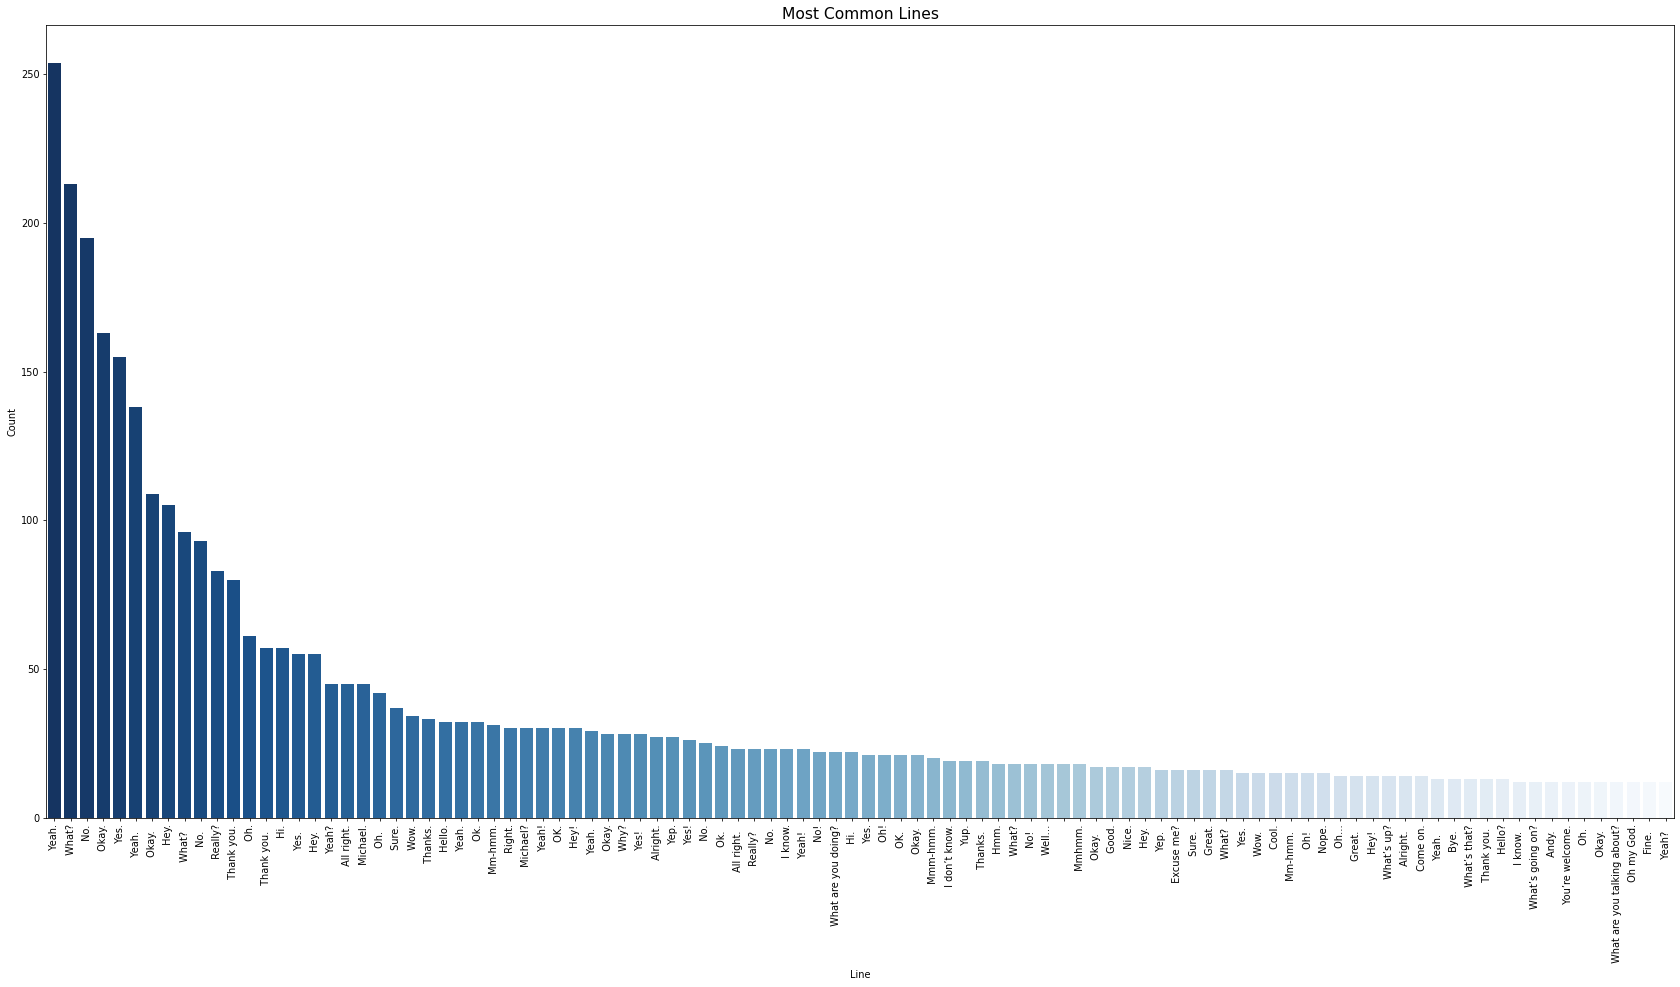

In [4]:
Line = df.drop_duplicates(subset=['Line'])
Line100 = Line.head(100)
plt.figure(figsize=(30,15))
Lines = sns.barplot(data=Line100, x = 'Line', y = 'Count', palette = 'Blues_r')
Lines.set_xticklabels(Lines.get_xticklabels(), rotation=90)
Lines.set_title('Most Common Lines',fontsize=16);

In [5]:
Jimdf = df.loc[df['Character'] == "Jim"]
Michaeldf = df.loc[df['Character'] == "Michael"]
Pamdf = df.loc[df['Character'] == "Pam"]
Dwightdf = df.loc[df['Character'] == "Dwight"]
Jandf = df.loc[df['Character'] == "Jan"]
Phyllisdf = df.loc[df['Character'] == "Phyllis"]
Stanleydf = df.loc[df['Character'] == "Stanley"]
Angeladf = df.loc[df['Character'] == "Angela"]
Kevindf = df.loc[df['Character'] == "Kevin"]
JimDwightdf = df.loc[df['Character'] == "Jim And Dwight"]
Jimdf.head()

,Unnamed: 0,Character,Line,Season,Episode_Number,Count
11959,12699,Jim,Yeah.,3,8,254
33234,34870,Jim,Yeah.,6,12,254
2144,2279,Jim,Yeah.,2,1,254
23831,25116,Jim,Yeah.,5,6,254
24869,26190,Jim,Yeah.,5,9,254


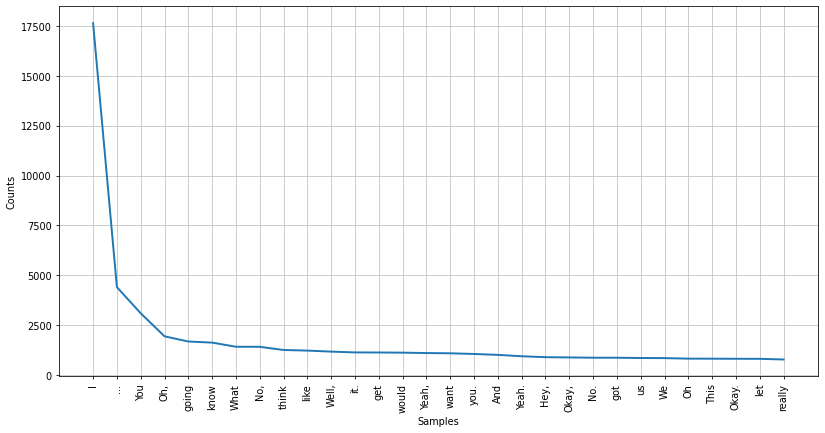

In [6]:
text = df['Line']
text = text.to_string()
text = contractions.fix(text)
tokens = [t for t in text.split()]

sw= stopwords.words('english')
#swJimDwight = ['7842','It','know','want','need','think','a..','t.','If','No,','Yeah.','cannot','know,','But','He','Do','I', ';','You','it','it\'s', 'I\'m', 'Oh,', ':', 'And','Okay', 'So', 'like', 'going', 'r', 'would', 'got', 'let', 'get', 'We', 'that.', 't.', 'it.', 'Okay,','That', 't,', 'It','What', 'This','The','one','Yeah','Oh','us','No.','t..','no,','you.','Hey,','Well,']
clean_tokens = tokens[:]
for token in tokens:
    if token in sw:
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(30, cumulative=False)

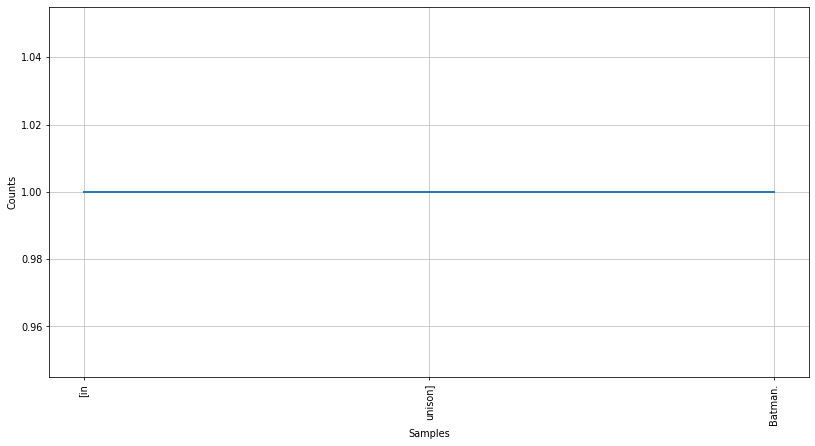

In [7]:
text = JimDwightdf['Line']
text = text.to_string()
text = contractions.fix(text)
tokens = [t for t in text.split()]

sw= stopwords.words('english')
swJimDwight = ['7842','It','know','want','need','think','a..','t.','If','No,','Yeah.','cannot','know,','But','He','Do','I', ';','You','it','it\'s', 'I\'m', 'Oh,', ':', 'And','Okay', 'So', 'like', 'going', 'r', 'would', 'got', 'let', 'get', 'We', 'that.', 't.', 'it.', 'Okay,','That', 't,', 'It','What', 'This','The','one','Yeah','Oh','us','No.','t..','no,','you.','Hey,','Well,']
clean_tokens = tokens[:]
for token in tokens:
    if token in sw or token in swJimDwight:
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(30, cumulative=False)

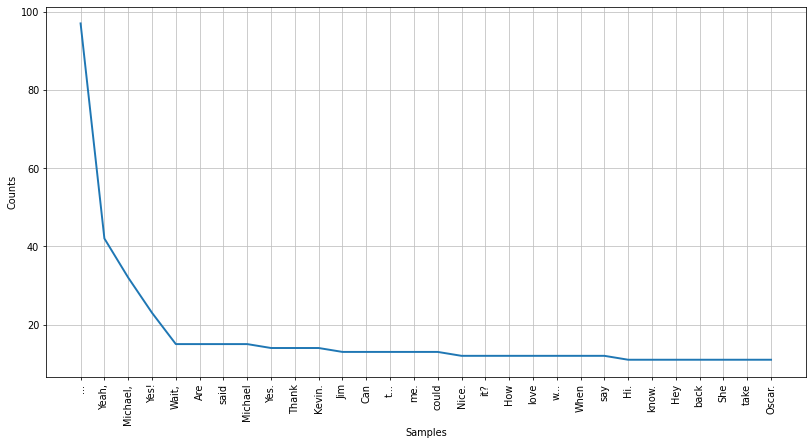

In [8]:
text = Kevindf['Line']
text = text.to_string()
text = contractions.fix(text)
tokens = [t for t in text.split()]

sw= stopwords.words('english')
swKevin = ['I', 'You', 'Oh', 'going', 'know', 'What', 'No', 'think', 'like', 'Well', 'it', 'get', 'would', 'Yeah', 'want', 'you.', 'And', 'Yeah', 'Hey,', 'Okay', 'No', 'got', 'us', 'We', 'Oh', 'This', 'Okay.', 'let', 'really', 't.','[to','th...','w.','t..','go','It','know','want','need','think','a..','t.','If','No,','Yeah.','cannot','know,','But','He','Do','I', ';','You','it','it\'s', 'I\'m', 'Oh,', ':', 'And','Okay', 'So', 'like', 'going', 'r', 'would', 'got', 'let', 'get', 'We', 'that.', 't.', 'it.', 'Okay,','That', 't,', 'It','What', 'This','The','one','Yeah','Oh','us','No.','t..','no,','you.','Hey,','Well,']
clean_tokens = tokens[:]
for token in tokens:
    if token in sw or token in swKevin:
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(30, cumulative=False)

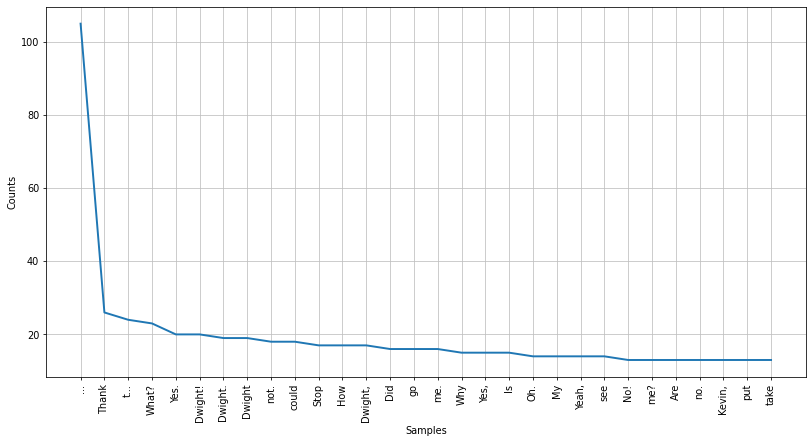

In [9]:
text = Angeladf['Line']
text = text.to_string()
text = contractions.fix(text)
tokens = [t for t in text.split()]

sw= stopwords.words('english')
swAngela = ['I', 'You', 'Oh', 'going', 'know', 'What', 'No', 'think', 'like', 'Well', 'it', 'get', 'would', 'Yeah', 'want', 'you.', 'And', 'Yeah', 'Hey,', 'Okay', 'No', 'got', 'us', 'We', 'Oh', 'This', 'Okay.', 'let', 'really','t..','It','know','want','need','think','a..','t.','If','No,','Yeah.','cannot','know,','But','He','Do','I', ';','You','it','it\'s', 'I\'m', 'Oh,', ':', 'And','Okay', 'So', 'like', 'going', 'r', 'would', 'got', 'let', 'get', 'We', 'that.', 't.', 'it.', 'Okay,','That', 't,', 'It','What', 'This','The','one','Yeah','Oh','us','No.','t..','no,','you.','Hey,','Well,']
clean_tokens = tokens[:]
for token in tokens:
    if token in sw or token in swAngela:
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(30, cumulative=False)